In [1]:

# Create a predictive model that can predict the mothly charges of a new customers base on the services and other details of the customer

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("customer_churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#EDA
#exploratory data analysis

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
for i in df.columns:
  print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [8]:
# df["TotalCharges"]=df["TotalCharges"].astype(float) if we use normal conversion
#it gives error becoz in object data type we may have spaces ,NAN,"5k".so we use below syntax.

In [9]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [10]:
#in errors field we can pass three things.
#    -raise(if there is a data which can't be converted into float,int.this is going go raise an error)
#    -coerce(if there is a data which can't be converted into float,int.it is goint convert them into NAN)
#    -ignore(if there is a data which can't be converted into float,int.it simply ignores and proceed further)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#data Cleansing:
# Null values
# Duplicates
# Outliers

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
df.duplicated().sum()

0

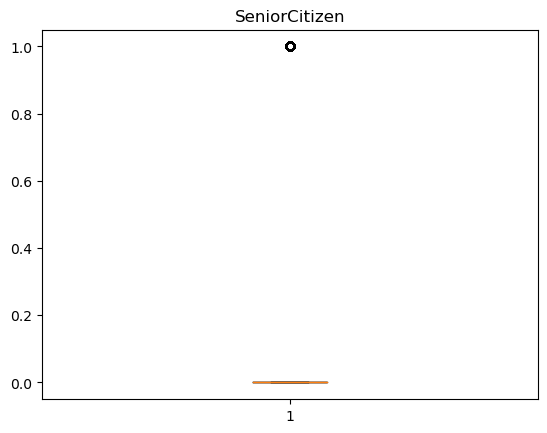

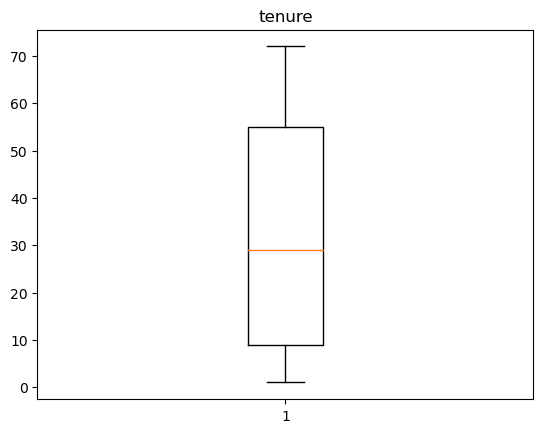

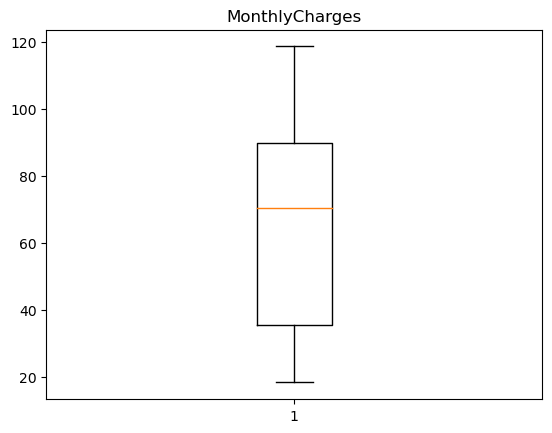

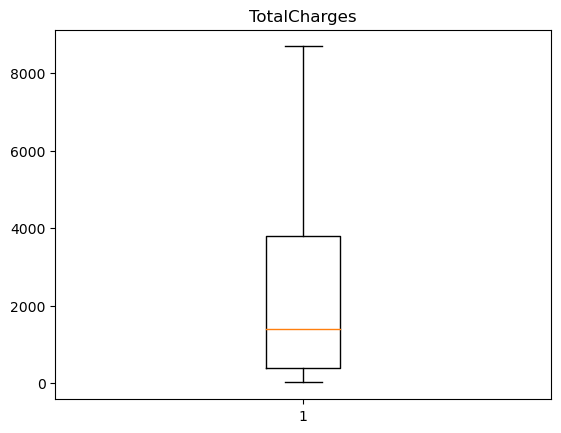

In [17]:
# Outlier analysis
for i in df.columns:
  if df[i].dtype!="object":
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [18]:
df=df.drop(["customerID"],axis=1)

# **Data PreProcessing**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
for col in df.columns:
  if df[col].dtype=="object":
    df[col]=le.fit_transform(df[col]) #fit--takes values only.
                                      #transform--in labelencoder it converts categorical type to numerical.

In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# feature selection

In [23]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<Axes: >

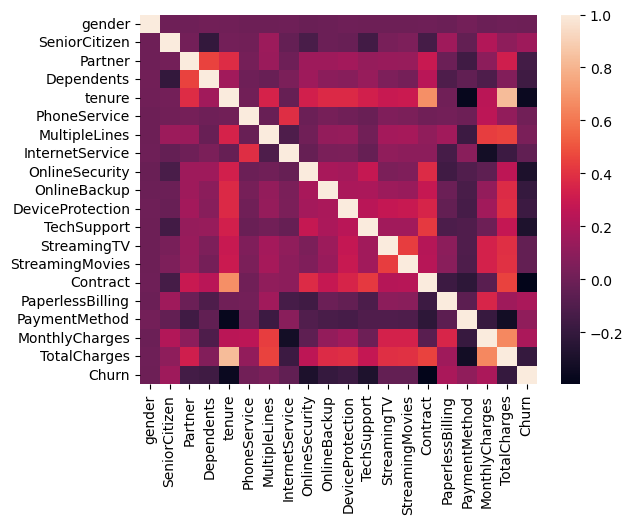

In [24]:
sns.heatmap(df.corr())

<Axes: >

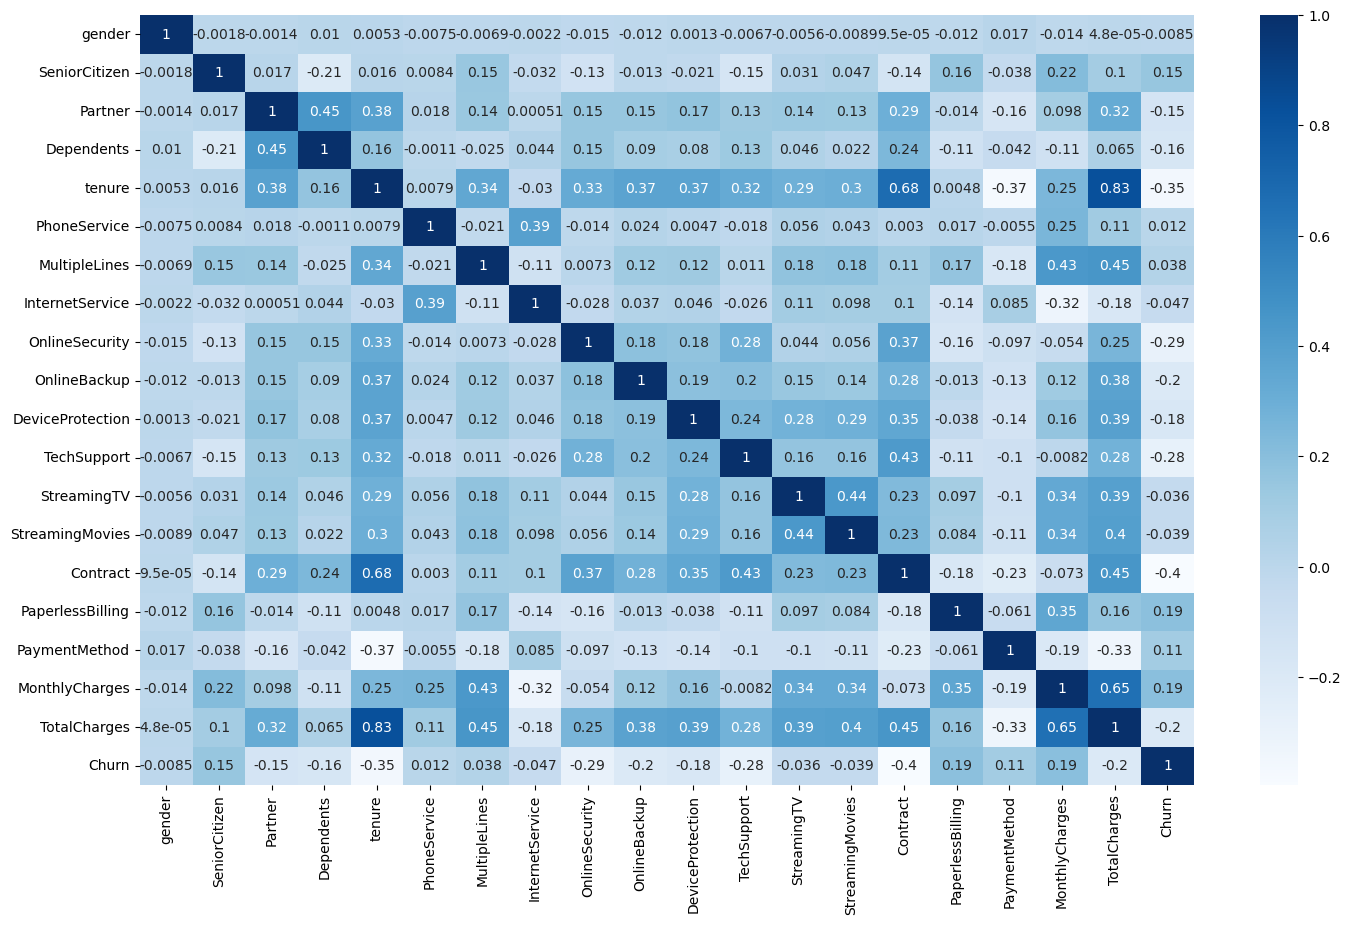

In [25]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [26]:
#VIF

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
col=[]
for i in df.columns:
  if (df[i].dtype!="object") &(i!="Churn"):
    col.append(i)

In [29]:

col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [30]:
x=df[col] #here x is nothing but a dataframe.

In [31]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [32]:
vif_data=pd.DataFrame()
vif_data["Feature"]=x.columns
vif_data["VIF_values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

#5 is the benchmark .we can remove the columns having more than 5.

,Feature,VIF_values
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


In [33]:
x=x.drop(["MonthlyCharges"],axis=1) #axis=1 represents the column where as axis=0 represents row 

In [34]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,306.60


In [35]:
vif_data=pd.DataFrame()
vif_data["Feature"]=x.columns
vif_data["VIF_values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Feature,VIF_values
0,gender,1.936952
1,SeniorCitizen,1.343210
2,Partner,2.814039
3,Dependents,1.957317
4,tenure,13.942277
5,PhoneService,8.202506
6,MultipleLines,2.511962
7,InternetService,3.646896
8,OnlineSecurity,2.247428
9,OnlineBackup,2.454485


In [36]:
x=x.drop(["tenure"],axis=1)

In [37]:
vif_data=pd.DataFrame()
vif_data["Feature"]=x.columns
vif_data["VIF_values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Feature,VIF_values
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [38]:
x=x.drop(["PhoneService"],axis=1)

In [39]:
vif_data=pd.DataFrame()
vif_data["Feature"]=x.columns
vif_data["VIF_values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Feature,VIF_values
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


In [40]:
x

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,306.60


In [41]:
# Splitting the data into dependent and independent data

In [42]:
x #independent data

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,306.60


In [43]:
y=df["Churn"] #dependent data

In [44]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [45]:
# split the data into train and testing

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=45)

In [49]:
x_train

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
5841,1,1,0,0,1,0,0,0,0,0,2,2,1,1,2,3264.45
1513,0,1,0,0,1,0,0,0,0,0,0,0,0,1,3,25.80
6238,1,1,1,0,2,1,0,0,0,0,0,0,0,0,0,3919.15
4579,1,0,0,0,2,1,0,2,0,0,0,0,0,1,2,2640.55
5601,0,0,1,1,1,0,0,0,0,2,2,0,1,0,3,1383.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,1,0,0,0,0,2,1,1,1,1,1,1,1,0,3,607.70
3622,0,0,1,1,2,0,2,2,2,2,2,2,2,0,1,6652.45
6021,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,254.50
5772,1,0,1,1,2,0,0,2,2,2,2,2,2,1,0,5601.40


In [50]:
y_train

5841    1
1513    1
6238    0
4579    0
5601    0
       ..
4711    0
3622    0
6021    0
5772    0
6567    0
Name: Churn, Length: 4922, dtype: int32

In [51]:
x_test

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
2287,1,1,1,0,2,1,0,2,2,2,2,2,2,1,0,7318.20
2087,0,0,0,0,1,0,2,2,0,0,0,0,0,1,2,137.85
2308,1,0,1,1,0,1,2,2,2,0,2,2,1,1,0,7288.40
1960,0,0,1,1,2,1,0,2,2,2,0,0,0,0,1,2888.70
4634,0,0,0,0,0,2,1,1,1,1,1,1,0,0,0,53.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,69.95
1034,0,0,1,0,0,0,2,0,2,2,2,2,2,0,0,5924.40
6628,0,0,0,0,0,1,0,2,0,0,2,2,1,1,3,633.45
6101,0,1,0,0,2,1,2,0,2,2,2,2,2,0,1,7467.55


In [52]:
y_test

2287    1
2087    1
2308    0
1960    0
4634    0
       ..
6237    1
1034    0
6628    0
6101    0
713     0
Name: Churn, Length: 2110, dtype: int32

In [53]:
# Model Implementation
from sklearn.linear_model import LogisticRegression

In [54]:
log_model=LogisticRegression() #log_model is the model name.

In [55]:
# training the model
log_model.fit(x_train,y_train) #we omly use fit becoz we only want values.

LogisticRegression()

In [56]:
# testing part
log_pred=log_model.predict(x_test)
log_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
y_test

2287    1
2087    1
2308    0
1960    0
4634    0
       ..
6237    1
1034    0
6628    0
6101    0
713     0
Name: Churn, Length: 2110, dtype: int32

In [58]:
from sklearn.metrics import *

In [59]:
accuracy_score(y_test,log_pred)

0.7815165876777251

In [61]:
#Extra>>>>>>

In [64]:
from sklearn.ensemble import RandomForestClassifier #ensemble module.

In [65]:
rf=RandomForestClassifier() #rf is the object here

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
rf_pred=rf.predict(x_test)

In [68]:
accuracy_score(y_test,rf_pred) #it is not optimize(gives the same result) becoz of using vif and outliers concept which is not
#used in the decision tree and random forest algorithm.

0.7777251184834123

In [69]:
# Problem statement 2
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [70]:
# df is having done with EDA already

In [71]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
In_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'TotalCharges', 'Churn']

In [73]:
X=df[In_cols]

In [74]:
x

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,306.60


In [75]:
Y=df['MonthlyCharges']

In [77]:
Y

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [79]:
from sklearn.linear_model import LinearRegression


In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.70,random_state=45)

In [81]:
lin_model=LinearRegression()

In [82]:
# training the model
lin_model.fit(x_train,y_train)

LinearRegression()

In [83]:
# testing part
lin_pred=lin_model.predict(x_test)
lin_pred

array([124.18660402,  45.06366654, 105.55032041, ...,  62.84087468,
       110.12694572,  56.32342744])

In [84]:
y_test

2287    108.40
2087     33.65
2308    104.65
1960     88.60
4634     18.75
         ...  
6237     69.95
1034     81.85
6628     94.05
6101    110.25
713      86.00
Name: MonthlyCharges, Length: 2110, dtype: float64

In [85]:
r2_score(y_test,lin_pred)

0.8114034102029251

In [88]:
rmse=np.sqrt(mean_squared_error(y_test,lin_pred))  #rmse is the 
#square root of the mean squared error.
#it gives the exact units by which the values are error values.

In [87]:
rmse   #avg error value is 13.15 .

13.152237062615423